In [1]:
import os
import pandas as pd

In [2]:
os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')

In [3]:
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n') # Column names
    f.write('NA,Pave,127500\n') # Each row represents a data example
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [4]:
df = pd.read_csv(data_file)
print(df)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [5]:
inputs, outputs = df.iloc[:, 0:2], df.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


<ipython-input-5-64169ea335a3>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  inputs = inputs.fillna(inputs.mean())


In [6]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


In [7]:
from mxnet import np,npx

In [8]:
X, y = np.array(inputs.values), np.array(outputs.values)
X, y

(array([[3., 1., 0.],
        [2., 0., 1.],
        [4., 0., 1.],
        [3., 0., 1.]], dtype=float64),
 array([127500, 106000, 178100, 140000], dtype=int64))

In [9]:
npx.set_np()

In [10]:
x = np.array(3.0)
y = np.array(2.0)

In [11]:
x + y, x * y, x / y, x**y

(array(5.), array(6.), array(1.5), array(9.))

In [12]:
x = np.arange(4)
x

array([0., 1., 2., 3.])

In [13]:
x[3]

array(3.)

In [14]:
len(x)

4

In [15]:
x.shape

(4,)

In [16]:
A = np.arange(20).reshape(5, 4)
A

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.],
       [16., 17., 18., 19.]])

In [17]:
A.T

array([[ 0.,  4.,  8., 12., 16.],
       [ 1.,  5.,  9., 13., 17.],
       [ 2.,  6., 10., 14., 18.],
       [ 3.,  7., 11., 15., 19.]])

In [18]:
B = np.array([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B

array([[1., 2., 3.],
       [2., 0., 4.],
       [3., 4., 5.]])

In [19]:
B == B.T

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [20]:
X = np.arange(24).reshape(2, 3, 4)
X

array([[[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]],

       [[12., 13., 14., 15.],
        [16., 17., 18., 19.],
        [20., 21., 22., 23.]]])

In [21]:
A = np.arange(20).reshape(5, 4)
B = A.copy() # Assign a copy of `A` to `B` by allocating new memory
A, A + B

(array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]]),
 array([[ 0.,  2.,  4.,  6.],
        [ 8., 10., 12., 14.],
        [16., 18., 20., 22.],
        [24., 26., 28., 30.],
        [32., 34., 36., 38.]]))

In [22]:
A*B

array([[  0.,   1.,   4.,   9.],
       [ 16.,  25.,  36.,  49.],
       [ 64.,  81., 100., 121.],
       [144., 169., 196., 225.],
       [256., 289., 324., 361.]])

In [23]:
a = 2
X = np.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(array([[[ 2.,  3.,  4.,  5.],
         [ 6.,  7.,  8.,  9.],
         [10., 11., 12., 13.]],
 
        [[14., 15., 16., 17.],
         [18., 19., 20., 21.],
         [22., 23., 24., 25.]]]),
 (2, 3, 4))

In [24]:
x = np.arange(4)
x, x.sum()

(array([0., 1., 2., 3.]), array(6.))

In [25]:
A.shape, A.sum()

((5, 4), array(190.))

In [26]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

(array([40., 45., 50., 55.]), (4,))

In [27]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(array([ 6., 22., 38., 54., 70.]), (5,))

In [28]:
A.sum(axis=[0, 1])

array(190.)

In [29]:
A.mean(), A.sum() / A.size

(array(9.5), array(9.5))

In [30]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(array([ 8.,  9., 10., 11.]), array([ 8.,  9., 10., 11.]))

In [31]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

array([[ 6.],
       [22.],
       [38.],
       [54.],
       [70.]])

In [32]:
A / sum_A

array([[0.        , 0.16666667, 0.33333334, 0.5       ],
       [0.18181819, 0.22727273, 0.27272728, 0.3181818 ],
       [0.21052632, 0.23684211, 0.2631579 , 0.28947368],
       [0.22222222, 0.24074075, 0.25925925, 0.2777778 ],
       [0.22857143, 0.24285714, 0.25714287, 0.27142859]])

In [33]:
A.cumsum(axis=0)

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  6.,  8., 10.],
       [12., 15., 18., 21.],
       [24., 28., 32., 36.],
       [40., 45., 50., 55.]])

In [34]:
y = np.ones(4)
x, y, np.dot(x, y)

(array([0., 1., 2., 3.]), array([1., 1., 1., 1.]), array(6.))

In [35]:
np.sum(x * y)

array(6.)

In [36]:
A.shape, x.shape, np.dot(A, x)

((5, 4), (4,), array([ 14.,  38.,  62.,  86., 110.]))

In [37]:
B = np.ones(shape=(4, 3))
np.dot(A, B)

array([[ 6.,  6.,  6.],
       [22., 22., 22.],
       [38., 38., 38.],
       [54., 54., 54.],
       [70., 70., 70.]])

In [38]:
u = np.array([3, -4])
np.linalg.norm(u)

array(5.)

In [39]:
np.abs(u).sum()

array(7.)

In [40]:
np.linalg.norm(np.ones((4, 9)))

array(6.)

In [53]:
from mxnet import np, npx
from d2l import mxnet as d2l
from IPython import display

In [42]:
npx.set_np()

In [44]:
def f(x):
    return 3 * x ** 2 - 4 * x

In [45]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

### Derivatives and Differentiation

In [46]:
h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [47]:
def use_svg_display(): #@save
    """Use the svg format to display a plot in Jupyter."""
    display.set_matplotlib_formats('svg')

In [48]:
def set_figsize(figsize=(3.5, 2.5)): #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [49]:
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [51]:
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
ylim=None, xscale='linear', yscale='linear',
fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""
    if legend is None:
        legend = []
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()
    # Return True if `X` (tensor or list) has 1 axis
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or
                isinstance(X, list) and not hasattr(X[0], "__len__"))
    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

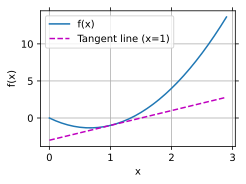

In [54]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

### Automatic Differentiation

In [55]:
from mxnet import autograd, np, npx

In [56]:
npx.set_np()
x = np.arange(4.0)
x

array([0., 1., 2., 3.])

In [57]:
x.attach_grad()


In [59]:
x.grad


array([0., 0., 0., 0.])

In [60]:
with autograd.record():
    y = 2 * np.dot(x, x)
y

array(28.)

In [61]:
y.backward()
x.grad

array([ 0.,  4.,  8., 12.])

In [62]:
x.grad == 4 * x

array([ True,  True,  True,  True])

In [63]:
with autograd.record():
    y = x.sum()
y.backward()
x.grad

array([1., 1., 1., 1.])

#### Backward for Non-Scalar Variables

In [65]:
with autograd.record():
    y = x * x # `y` is a vector
y.backward()
x.grad 

array([0., 2., 4., 6.])

### Detaching Computation

In [66]:
with autograd.record():
    y = x * x
    u = y.detach()
    z = u * x
z.backward()
x.grad == u

array([ True,  True,  True,  True])

In [67]:
y.backward()
x.grad == 2 * x

array([ True,  True,  True,  True])

### Computing the Gradient of Python Control Flow


In [68]:
def f(a):
    b = a * 2
    while np.linalg.norm(b) < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c



In [69]:
a = np.random.normal()
a.attach_grad()
with autograd.record():
    d = f(a)
d.backward()


In [70]:
a.grad == d / a

array(True)

###  Basic Probability Theory

In [71]:
import random
from mxnet import np, npx
from d2l import mxnet as d2l
npx.set_np()


In [79]:
fair_probs = [1.0 / 6] * 6
np.random.multinomial(1, fair_probs)

array([0, 0, 0, 0, 0, 1], dtype=int64)

In [82]:
np.random.multinomial(10, fair_probs)

array([ 0,  0,  0,  0,  0, 10], dtype=int64)

In [83]:
counts = np.random.multinomial(1000, fair_probs).astype(np.float32)
counts / 1000

array([0., 0., 0., 0., 0., 1.])

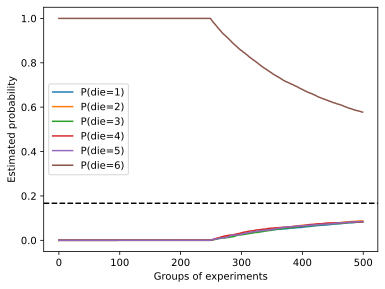

In [86]:
counts = np.random.multinomial(10, fair_probs, size=500)
cum_counts = counts.astype(np.float32).cumsum(axis=0)
estimates = cum_counts / cum_counts.sum(axis=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].asnumpy(),label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

In [87]:
print(dir(np.random))

['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_mx_nd_np', 'beta', 'chisquare', 'choice', 'exponential', 'gamma', 'gumbel', 'logistic', 'lognormal', 'multinomial', 'multivariate_normal', 'normal', 'pareto', 'power', 'rand', 'randint', 'randn', 'rayleigh', 'shuffle', 'uniform', 'weibull']


In [88]:
help(np.ones)


Help on function ones in module mxnet.numpy:

ones(shape, dtype=<class 'numpy.float32'>, order='C', ctx=None)
    Return a new array of given shape and type, filled with ones.
    This function currently only supports storing multi-dimensional data
    in row-major (C-style).
    
    Parameters
    ----------
    shape : int or tuple of int
        The shape of the empty array.
    dtype : str or numpy.dtype, optional
        An optional value type. Default is `numpy.float32`. Note that this
        behavior is different from NumPy's `ones` function where `float64`
        is the default value, because `float32` is considered as the default
        data type in deep learning.
    order : {'C'}, optional, default: 'C'
        How to store multi-dimensional data in memory, currently only row-major
        (C-style) is supported.
    ctx : Context, optional
        An optional device context (default is the current default context).
    
    Returns
    -------
    out : ndarray
        

In [89]:
np.ones(4)

array([1., 1., 1., 1.])